In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [173]:
df=pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [174]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0
28295,8,CASH_OUT,138651.85,C297851161,0.0,0.00,C1034382650,142758.39,281410.24,0.0,0.0


In [175]:
df.columns
df.drop([ 'isFlaggedFraud'],axis = 1, inplace = True)

About Dataset

In [176]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [177]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.0,C219416103,1523685.68,1530956.05,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.0,C483817115,10085462.79,10014348.15,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.0,C1326121635,112673.41,202020.02,0.0
28295,8,CASH_OUT,138651.85,C297851161,0.0,0.0,C1034382650,142758.39,281410.24,0.0
28296,8,CASH_OUT,61553.92,C1612091270,0.0,0.0,C8733802,242151.60,30370.00,NaN


In [178]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [179]:
#checking for correlation
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.072184,-0.041737,-0.042136,-0.000999,0.027299,-0.047829
amount,0.072184,1.000000,0.037240,0.022199,0.320886,0.428226,0.081981
oldbalanceOrg,-0.041737,0.037240,1.000000,0.997933,0.144482,0.109220,-0.004231
newbalanceOrig,-0.042136,0.022199,0.997933,1.000000,0.148964,0.110361,-0.018826
oldbalanceDest,-0.000999,0.320886,0.144482,0.148964,1.000000,0.918069,-0.013884
newbalanceDest,0.027299,0.428226,0.109220,0.110361,0.918069,1.000000,-0.008683
isFraud,-0.047829,0.081981,-0.004231,-0.018826,-0.013884,-0.008683,1.000000


HeatMap

<Axes: >

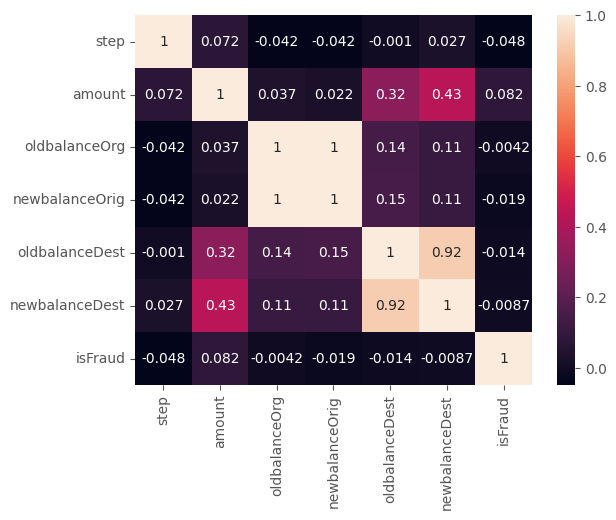

In [180]:
sns.heatmap(df.corr(),annot=True)

Univariate analysis

<Axes: xlabel='step', ylabel='Count'>

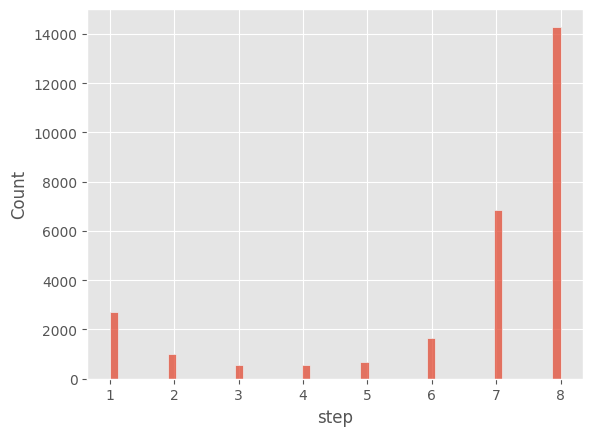

In [181]:
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

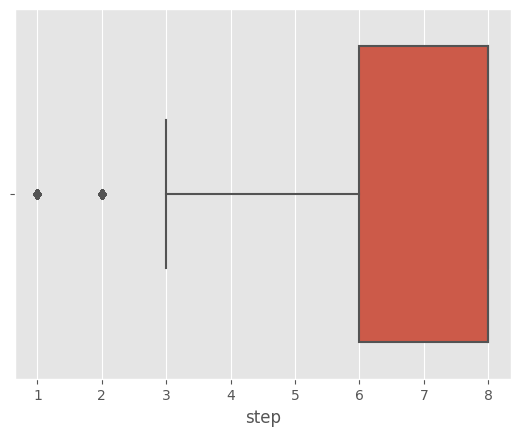

In [182]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

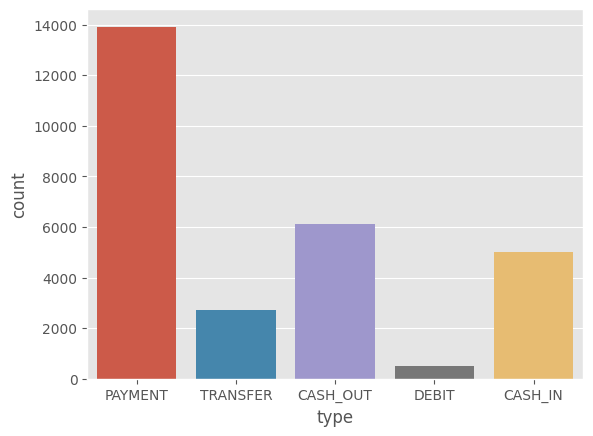

In [183]:
#type
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

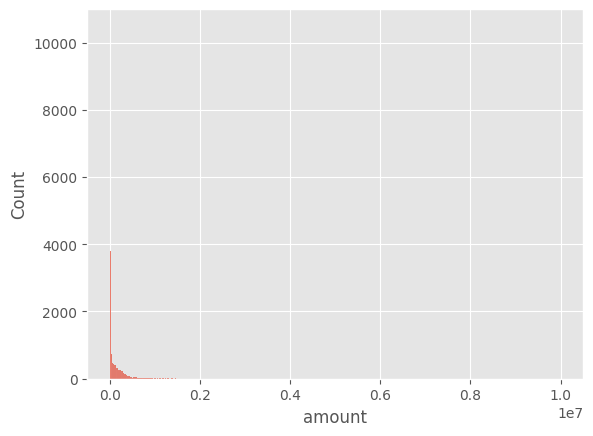

In [184]:
#amount
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

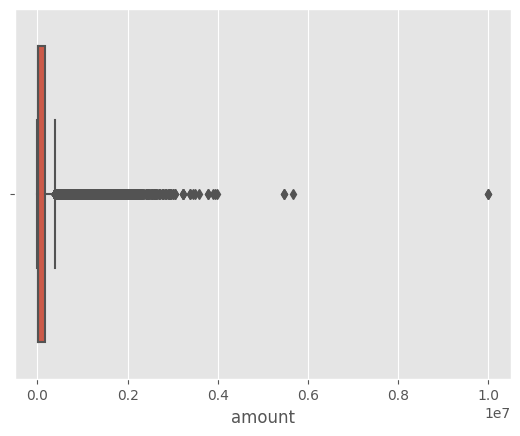

In [185]:
sns.boxplot(data=df,x="amount")

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

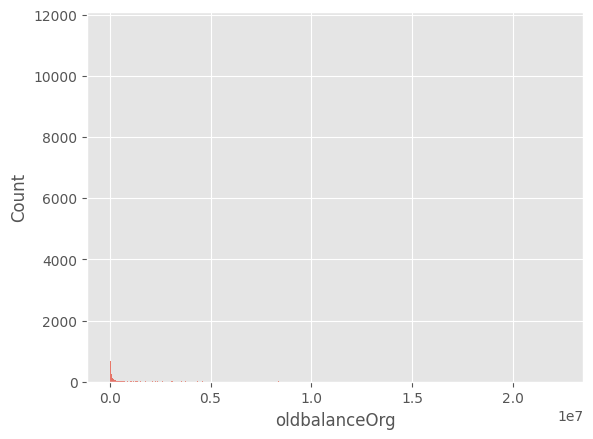

In [186]:
#oldbalanceOrg
sns.histplot(data=df,x="oldbalanceOrg")

In [187]:
#nameDest
df['nameDest'].value_counts()

C985934102     71
C1286084959    60
C1590550415    59
C2083562754    58
C248609774     57
               ..
M234932558      1
M1653072658     1
M206287129      1
C1692066743     1
C345691183      1
Name: nameDest, Length: 17076, dtype: int64

<Axes: xlabel='oldbalanceDest'>

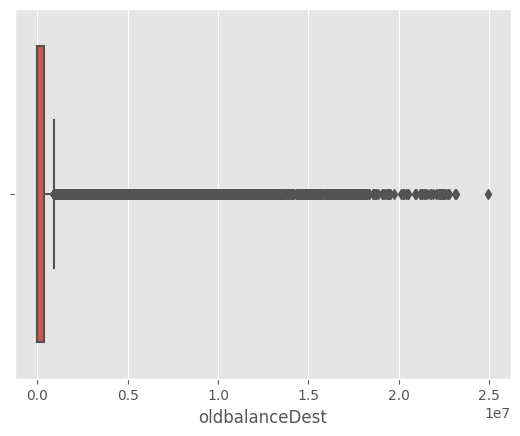

In [188]:
#oldbalanceDest
sns.boxplot(data=df,x="oldbalanceDest")

<Axes: xlabel='newbalanceDest'>

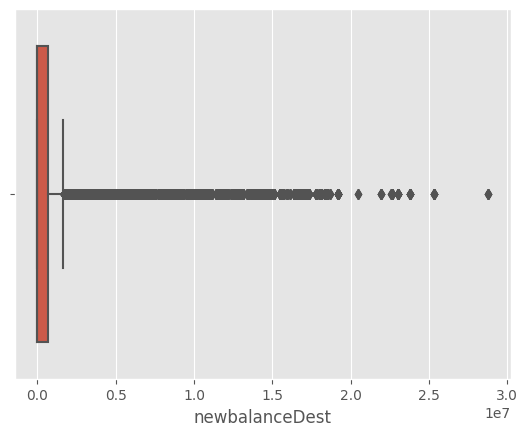

In [189]:
#newbalanceDest
sns.boxplot(data=df,x="newbalanceDest")

<Axes: xlabel='isFraud', ylabel='count'>

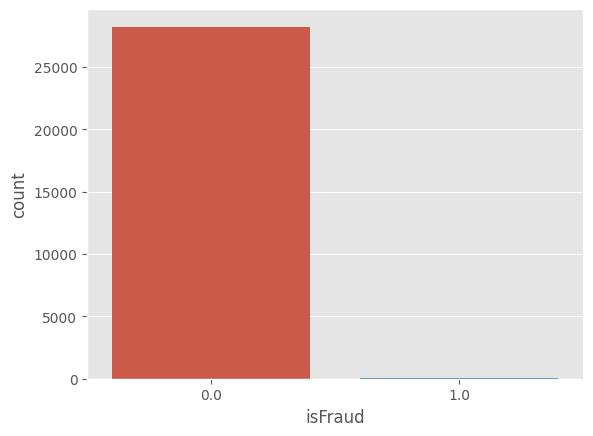

In [190]:
#isFraud:
sns.countplot(data=df,x='isFraud')

In [191]:
df['isFraud'].value_counts()

0.0    28212
1.0       84
Name: isFraud, dtype: int64

In [192]:
df.loc[df['isFraud']==0, 'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1, 'isFraud'] = 'is Fraud'

In [193]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,is not Fraud
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,is not Fraud
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,is not Fraud
28295,8,CASH_OUT,138651.85,C297851161,0.0,0.00,C1034382650,142758.39,281410.24,is not Fraud


Bivariate analysis

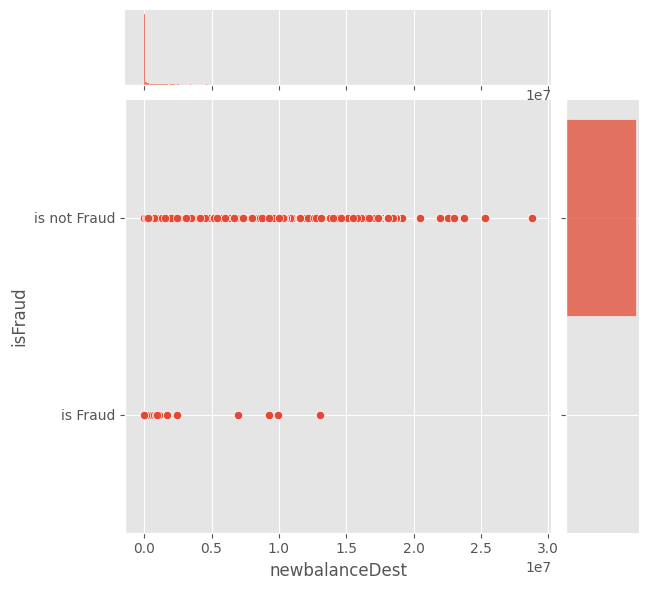

In [194]:
sns.jointplot(data=df,x="newbalanceDest",y="isFraud")

<Axes: xlabel='type', ylabel='count'>

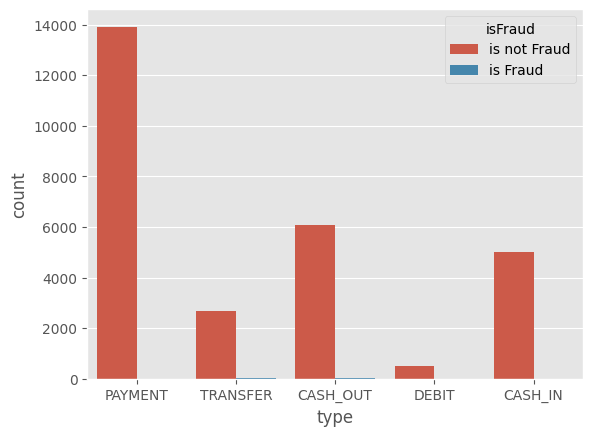

In [195]:
sns.countplot(data=df,x="type",hue="isFraud")

<Axes: xlabel='isFraud', ylabel='step'>

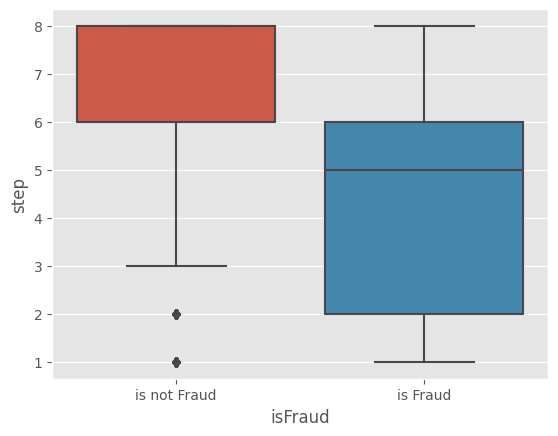

In [196]:
sns.boxplot(data=df,x="isFraud",y="step")

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

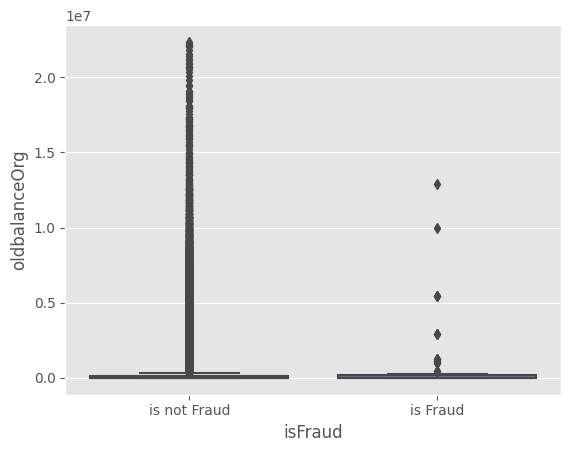

In [197]:
sns.boxplot(data=df,x="isFraud",y="oldbalanceOrg")

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

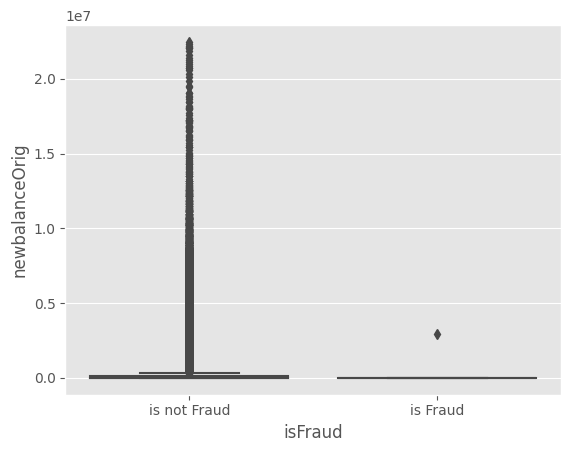

In [198]:
sns.boxplot(data=df,x="isFraud",y="newbalanceOrig")

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

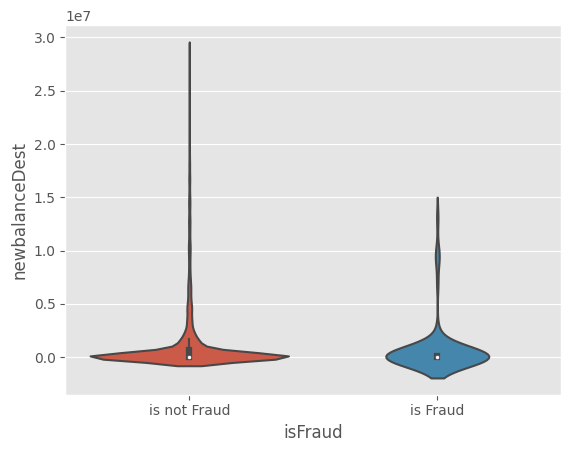

In [199]:
sns.violinplot(data=df,x="isFraud",y="newbalanceDest")

In [200]:
df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,28297.000000,28297,2.829700e+04,28297,2.829700e+04,2.829700e+04,28297,2.829700e+04,2.829700e+04,28296
unique,NaN,5,NaN,28297,NaN,NaN,17076,NaN,NaN,2
top,NaN,PAYMENT,NaN,C1231006815,NaN,NaN,C985934102,NaN,NaN,is not Fraud
freq,NaN,13913,NaN,1,NaN,NaN,71,NaN,NaN,28212
mean,6.508252,NaN,1.357405e+05,NaN,7.667026e+05,7.823551e+05,NaN,8.483811e+05,1.191306e+06,NaN
std,2.291090,NaN,3.013167e+05,NaN,2.126123e+06,2.166615e+06,NaN,2.513869e+06,3.106440e+06,NaN
min,1.000000,NaN,1.770000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,6.000000,NaN,5.966520e+03,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,8.000000,NaN,1.950669e+04,NaN,1.963654e+04,3.682140e+03,NaN,0.000000e+00,0.000000e+00,NaN
75%,8.000000,NaN,1.601022e+05,NaN,1.386575e+05,1.407606e+05,NaN,3.654323e+05,6.670935e+05,NaN


Data Pre-processing

In [201]:
# Shape of csv data
df.shape

(28297, 10)

In [202]:
df.drop(['nameOrig', 'nameDest'], axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [203]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud


Checking for null values

In [204]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
dtype: int64

In [205]:
df=df.dropna()

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28296 entries, 0 to 28295
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28296 non-null  int64  
 1   type            28296 non-null  object 
 2   amount          28296 non-null  float64
 3   oldbalanceOrg   28296 non-null  float64
 4   newbalanceOrig  28296 non-null  float64
 5   oldbalanceDest  28296 non-null  float64
 6   newbalanceDest  28296 non-null  float64
 7   isFraud         28296 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.9+ MB


Handling Outliers

<Axes: >

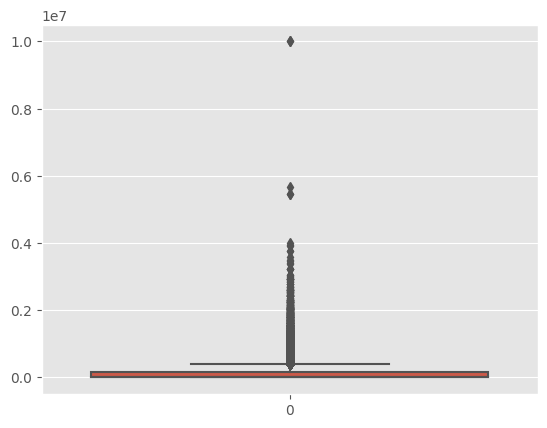

In [207]:
sns.boxplot(df['amount'])

Remove the Outliers

In [208]:
from scipy import stats
print(stats.mode(df[ 'amount']))
print(np.mean(df['amount']))

ModeResult(mode=17320.91, count=3)
135743.1112651965


In [209]:
q1 = np.quantile(df['amount'],0.25)
q3 = np.quantile(df['amount'],0.75)
IQR = q3-q1
upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper Bound :',upper_bound)
print('Lower Bound :',lower_bound)
print('Skewed data :',len(df[df['amount']>upper_bound]))
print('Skewed data :',len(df[df['amount']<lower_bound]))

q1 : 5966.462500000001
q3 : 160111.7525
IQR : 154145.29
Upper Bound : 391329.6875
Lower Bound : -225251.4725
Skewed data : 2282
Skewed data : 0


In [210]:
# To handle outliers transformation techniques are used.
def transformationPlot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)
  plt.subplot(1,2,2)
  stats.probplot(feature,plot=plt)

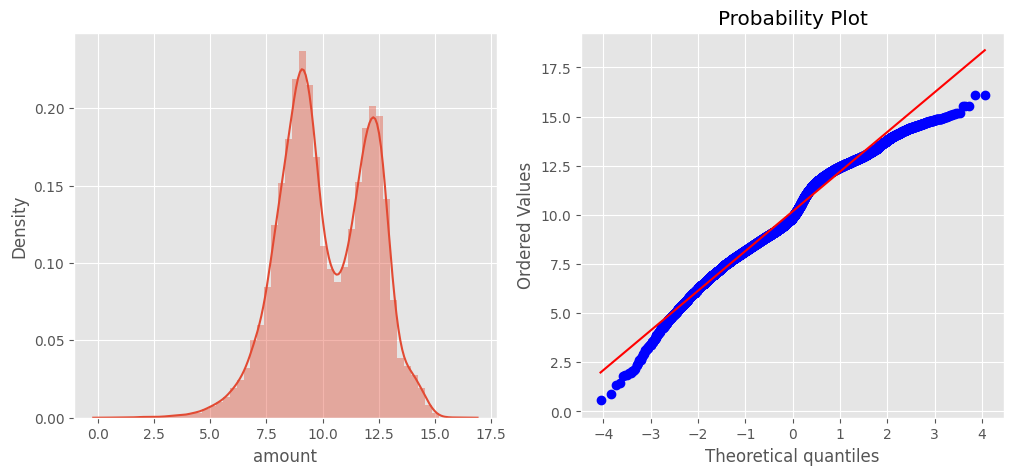

In [211]:
transformationPlot(np.log(df['amount']))

Object data labelencoding

In [212]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

In [213]:
df[ "type" ].value_counts()

3    13913
1     6108
0     5027
4     2735
2      513
Name: type, dtype: int64

dividing the dataset into dependent and independent y and x respectively

In [214]:
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [215]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.00,0.00
1,1,3,1864.28,21249.0,19384.72,0.00,0.00
2,1,4,181.00,181.0,0.00,0.00,0.00
3,1,1,181.00,181.0,0.00,21182.00,0.00
4,1,3,11668.14,41554.0,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
28291,8,1,78635.42,0.0,0.00,17277864.84,17356500.26
28292,8,1,7270.37,0.0,0.00,1523685.68,1530956.05
28293,8,1,113043.31,0.0,0.00,10085462.79,10014348.15
28294,8,1,89346.62,0.0,0.00,112673.41,202020.02


In [216]:
y

0        is not Fraud
1        is not Fraud
2            is Fraud
3            is Fraud
4        is not Fraud
             ...     
28291    is not Fraud
28292    is not Fraud
28293    is not Fraud
28294    is not Fraud
28295    is not Fraud
Name: isFraud, Length: 28296, dtype: object

Splitting data into train and test

In [217]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [218]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(22636, 7)
(5660, 7)
(5660,)
(22636,)


Model Building

Random Forest classifier

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9975265017667845

In [220]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [221]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,5,14
is not Fraud,0,5641


In [222]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       1.00      0.26      0.42        19
is not Fraud       1.00      1.00      1.00      5641

    accuracy                           1.00      5660
   macro avg       1.00      0.63      0.71      5660
weighted avg       1.00      1.00      1.00      5660



Decision tree Classifier

In [223]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9977031802120141

In [224]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [225]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,11,8
is not Fraud,5,5636


In [226]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.69      0.58      0.63        19
is not Fraud       1.00      1.00      1.00      5641

    accuracy                           1.00      5660
   macro avg       0.84      0.79      0.81      5660
weighted avg       1.00      1.00      1.00      5660



ExtraTrees Classifier

In [227]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy

0.9978798586572438

In [228]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [229]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,7,12
is not Fraud,0,5641


In [230]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       1.00      0.37      0.54        19
is not Fraud       1.00      1.00      1.00      5641

    accuracy                           1.00      5660
   macro avg       1.00      0.68      0.77      5660
weighted avg       1.00      1.00      1.00      5660



SupportVectorMachine Classifier

In [231]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9966431095406361

In [232]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9972610001767097

In [233]:
pd.crosstab(y_test,y_test_predict4)

col_0,is not Fraud
isFraud,
is Fraud,19
is not Fraud,5641


In [234]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       0.00      0.00      0.00        19
is not Fraud       1.00      1.00      1.00      5641

    accuracy                           1.00      5660
   macro avg       0.50      0.50      0.50      5660
weighted avg       0.99      1.00      0.99      5660



In [235]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [243]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [244]:
y_test1=la.transform(y_test)

In [246]:
y_test1

array([1, 1, 1, ..., 1, 1, 1])

In [247]:
y_train1

array([1, 1, 1, ..., 1, 1, 1])

xgboost Classifier

In [248]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train,y_train1)
y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_testl,y_test_predict5)
test_accuracy

0.9985865724381625

In [253]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

1.0

In [255]:
pd.crosstab(y_testl,y_test_predict5)

col_0,0,1
row_0,,
0,11,8
1,0,5641


In [256]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testl,y_test_predict5))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        19
           1       1.00      1.00      1.00      5641

    accuracy                           1.00      5660
   macro avg       1.00      0.79      0.87      5660
weighted avg       1.00      1.00      1.00      5660



In [259]:
def compareModel():
  print("train accuracy for rfc",accuracy_score(y_train_predict1,y_train))
  print("test accuracy for rfc",accuracy_score(y_test_predict1,y_test))
  print("train accuracy for dtc",accuracy_score(y_train_predict2,y_train))
  print("test accuracy for dtc",accuracy_score(y_test_predict2,y_test))
  print("train accuracy for etc",accuracy_score(y_train_predict3,y_train))
  print("test accuracy for etc",accuracy_score(y_test_predict3,y_test))
  print("train accuracy for svc",accuracy_score(y_train_predict4,y_train))
  print("test accuracy for svc",accuracy_score(y_test_predict4,y_test))
  print("train accuracy for xgbl",accuracy_score(y_train_predict5,y_trainl))
  print("test accuracy for xgbl",accuracy_score(y_test_predict5,y_testl))

In [260]:
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.9975265017667845
train accuracy for dtc 1.0
test accuracy for dtc 0.9977031802120141
train accuracy for etc 1.0
test accuracy for etc 0.9978798586572438
train accuracy for svc 0.9972610001767097
test accuracy for svc 0.9966431095406361
train accuracy for xgbl 1.0
test accuracy for xgbl 0.9985865724381625


Evaluating performance of the model and saving the model

In [263]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9966431095406361

In [266]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9972610001767097

In [265]:
import pickle
pickle.dump(svc,open("payments.pkl", "wb"))